In [1]:
#Imports
import matplotlib.pyplot as plt
from src import *
from src.helpers.getMatrix import spectrumObject
import pickle
from scipy.linalg import qr, svdvals

In [2]:
#Matrix Parameters
n = 1024
spectrumLevels = [1,1e-12]
decayRange = [5,80]
decayTypes = ['smoothgap']
rowSpaces = ['coherent', 'incoherent', 'random']
ks = [70]
figSize = (10,6)

In [ ]:
#Generate matrices
spec = spectrumObject(spectrumLevels,decayRange,decayTypes)
matrices = {}
trueVs = {}

for rowSpace in rowSpaces:
    U, sigma, V = getMatrix(n, rowSpace, spec, True, .01)
    matrices[rowSpace] = U @ sigma @ V.T
    trueVs[rowSpace] = V

In [ ]:
coherence(matrices['incoherent'][:,:70], 70)

In [ ]:
#Plot singular spectrum, gap
fig, ax = plt.subplots(figsize=figSize)
singularValues = np.diag(sigma)

plt.semilogy(range(150), singularValues[:150])
plt.plot(np.array(range(n))[ks], singularValues[ks],'o', color = '#1f77b4', markersize=12,
markeredgecolor="red", markerfacecolor="red", label ='k values')

plt.xlabel('Index k')
plt.ylabel(r'Singular Value $\sigma_k$')
plt.legend()

In [ ]:
#Gamma_k and r_k
shiftedSV = singularValues[1:]
gammaK = shiftedSV/singularValues[:-1]

rK = []
for k in range(n-1):
    r = np.sum([singularValues[i]**2 for i in range(k+1, n)])/(singularValues[k+1]**2)
    rK.append(r)

# plt.plot(range(150), gammaK[:150], '--')
plt.plot(np.array(range(n))[ks], np.array(rK)[ks],'o', color = '#1f77b4', markersize=12,
         markeredgecolor="red", markerfacecolor="red", label =r'$k$ values')
plt.legend()
print(gammaK[ks])
print(np.array(rK)[ks])
plt.plot(rK[:150])

In [ ]:
#Algorithm Parameters
sketchType = 'Gaussian'
trialNumber = 250
oversampling = [5]
indices = range(n)

In [ ]:
#Get RGKS right singular spectrum data
Ahats = {}
projectorData = {}
pis = {}

for k in ks:

    for rowSpace in rowSpaces:

        A = matrices[rowSpace]

        for p in oversampling:

            print(f'k = {k}, {rowSpace}, Oversampling: {p}')
            rgksResults = [randomGKS(A, k, p, sketchType, getDist=True, getV=True) for i in range(trialNumber)]
            Ahats[(k,rowSpace,p)], pis[(k,rowSpace,p)], projectorData[(k,rowSpace,p)] = zip(*rgksResults)

with open('Jupyter Data/Ahats.pkl', 'wb') as f:
    pickle.dump(Ahats, f)

with open('Jupyter Data/projectorData.pkl', 'wb') as f:
    pickle.dump(projectorData, f)

with open('Jupyter Data/trueVs.pkl', 'wb') as f:
    pickle.dump(trueVs, f)

In [ ]:
projectorData[(70,'coherent',p)].shape

In [ ]:
#Get projector differences and statistics across trials
with open('Jupyter Data/projectorData.pkl', 'rb') as f:
    projectorData = pickle.load(f)
with open('Jupyter Data/trueVs.pkl', 'rb') as f:
    trueVs = pickle.load(f)

p = 5
projectorDifferences = {}
spectralNorms = {}
maxElemDiffs = {}
medianElemDiffs = {}
averageElemDiffs = {}

for k in ks:

    for rowSpace in rowSpaces:

        print(f'k = {k}, {rowSpace}')
        V = trueVs[rowSpace][:,:k]
        print('diff')
        projectorDifferences[(k,rowSpace)] = [V@V.T-Vhat@Vhat.T for Vhat in projectorData[(k,rowSpace,p)]]
        print('spec')
        spectralNorms[(k,rowSpace)] = [np.linalg.norm(diff, 2) for diff in projectorDifferences[(k,rowSpace)]]
        print('max')
        maxElemDiffs[(k,rowSpace)] = [np.max(np.abs(diff)) for diff in projectorDifferences[(k,rowSpace)]]
        print('median')
        medianElemDiffs[(k,rowSpace)] = [np.median(np.abs(diff)) for diff in projectorDifferences[(k,rowSpace)]]
        print('average')
        averageElemDiffs[(k,rowSpace)] = [np.average(np.abs(diff)) for diff in projectorDifferences[(k,rowSpace)]]

In [ ]:
#Save Data
with open('Jupyter Data/Ahats.pkl', 'wb') as f:
    pickle.dump(Ahats, f)
with open('Jupyter Data/projectorDifferences.pkl', 'wb') as f:
    pickle.dump(projectorDifferences, f)
with open('Jupyter Data/spectralNorms.pkl', 'wb') as f:
    pickle.dump(spectralNorms, f)
with open('Jupyter Data/maxElemDiffs.pkl', 'wb') as f:
    pickle.dump(maxElemDiffs, f)
with open('Jupyter Data/medianElemDiffs.pkl', 'wb') as f:
    pickle.dump(medianElemDiffs, f)
with open('Jupyter Data/averageElemDiffs.pkl', 'wb') as f:
    pickle.dump(averageElemDiffs, f)
with open('Jupyter Data/pis.pkl', 'wb') as f:
    pickle.dump(pis, f)

In [3]:
#Load Data
with open('Jupyter Data/Ahats.pkl', 'rb') as f:
    Ahats = pickle.load(f)

with open('Jupyter Data/projectorData.pkl', 'rb') as f:
    projectorData = pickle.load(f)

with open('Jupyter Data/projectorDifferences.pkl', 'rb') as f:
    projectorDifferences = pickle.load(f)

with open('Jupyter Data/spectralNorms.pkl', 'rb') as f:
    spectralNorms = pickle.load(f)

with open('Jupyter Data/maxElemDiffs.pkl', 'rb') as f:
    maxElemDiffs = pickle.load(f)

with open('Jupyter Data/medianElemDiffs.pkl', 'rb') as f:
    medianElemDiffs = pickle.load(f)

with open('Jupyter Data/averageElemDiffs.pkl', 'rb') as f:
    averageElemDiffs = pickle.load(f)

with open('Jupyter Data/pis.pkl', 'rb') as f:
    pis = pickle.load(f)

Text(0, 0.5, 'Counts')

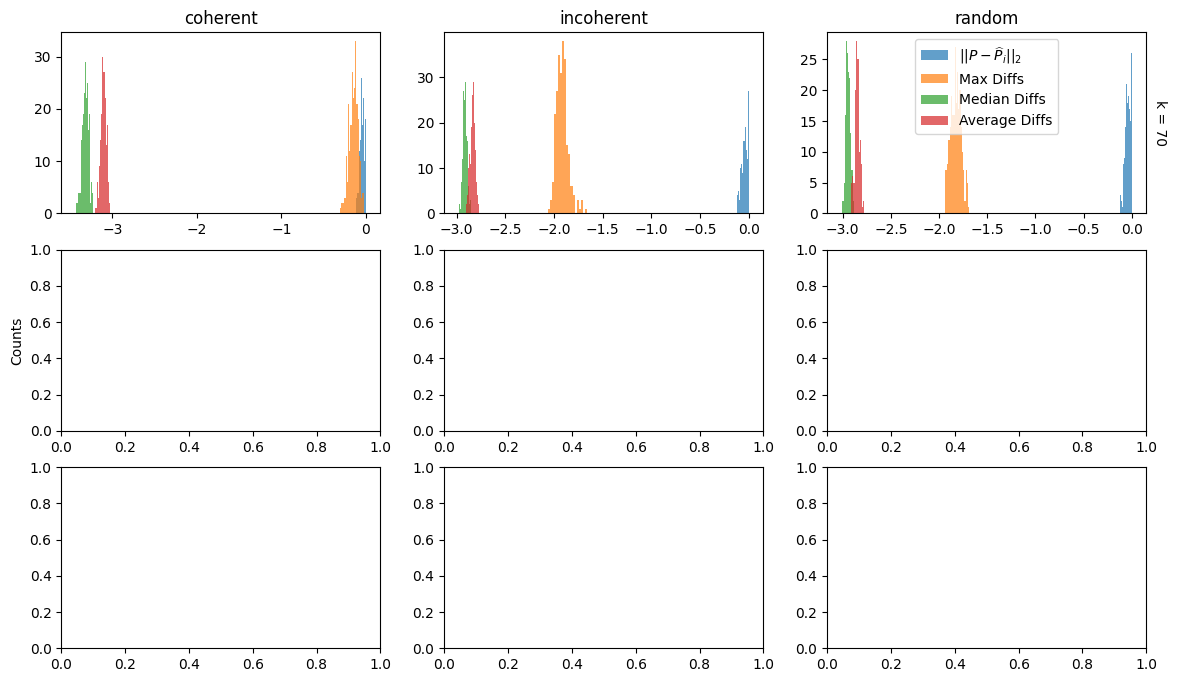

In [4]:
#Variable Statistic Histograms
fig, ax = plt.subplots(3,3,figsize=(14,8))
bins = 20
alpha = .7

colors = [f'C{i}' for i in range(4)]

for i, k in enumerate(ks):
    for j, rowSpace in enumerate(rowSpaces):
        ax[i][j].hist(np.log10(spectralNorms[(k,rowSpace)]), bins, label = r'$||P-\widehat{P}_i||_2$', alpha = alpha, color = colors[0])
        ax[i][j].hist(np.log10(maxElemDiffs[(k,rowSpace)]), bins, label = 'Max Diffs', alpha = alpha, color = colors[1])
        ax[i][j].hist(np.log10(medianElemDiffs[(k,rowSpace)]), bins, label = 'Median Diffs', alpha = alpha, color = colors[2])
        ax[i][j].hist(np.log10(averageElemDiffs[(k,rowSpace)]), bins, label = 'Average Diffs', alpha = alpha, color = colors[3])

        # ax[i][j].set_ylim(0,17)
        # ax[i][j].set_xlim(-9,1)
        ax[0][j].set_title(f'{rowSpace}')
        ax[i][2].set_ylabel(f'k = {k}', rotation=270, labelpad=15)
        ax[i][j].yaxis.set_label_position("right")
ax[0][2].legend()

#for axis titles
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.ylabel("Counts")

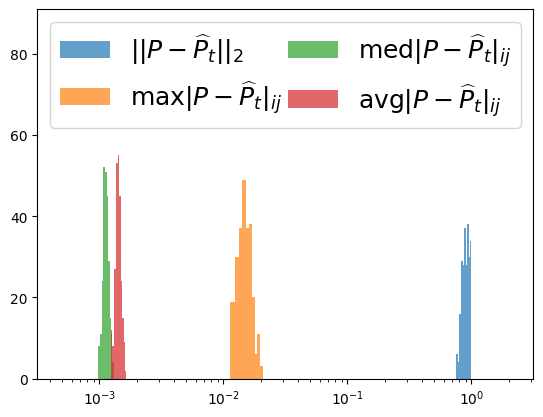

In [5]:
#Single Statistic Histograms
fig, ax = plt.subplots()
bins = 10
alpha = .7

k = 70
rowSpace = 'random'

colors = [f'C{i}' for i in range(4)]

plt.hist(spectralNorms[(k,rowSpace)], bins, label = r'$||P-\widehat{P}_t||_2$', alpha = alpha, color = colors[0])
plt.hist(maxElemDiffs[(k,rowSpace)], bins, label = r'max$|P-\widehat{P}_t|_{ij}$', alpha = alpha, color = colors[1])
plt.hist(medianElemDiffs[(k,rowSpace)], bins, label = r'med$|P-\widehat{P}_t|_{ij}$', alpha = alpha, color = colors[2])
plt.hist(averageElemDiffs[(k,rowSpace)], bins, label = r'avg$|P-\widehat{P}_t|_{ij}$', alpha = alpha, color = colors[3])
plt.xlim((10**-3.5,10**.5))
plt.ylim((0,91))

plt.xscale('log')
plt.xticks([1e0,1e-1,1e-2,1e-3])
if rowSpace == 'random':
    ax.legend(bbox_transform=fig.transFigure, mode = 'expand', ncols = 2, prop={'size': 18})
    # plt.legend(loc='upper right')
plt.rcParams.update({'font.size': 24})
plt.savefig(f'Figures/{k}{rowSpace}histogram.pdf', bbox_inches='tight')

In [ ]:
smallestTrueSingularValues = {}
smallestApproximateSingularValues = {}
p=5

for k in ks:
    for rowSpace in rowSpaces:

        trueV = trueVs[rowSpace][:,:k] #n x k

        #True permutation
        _,_,truePi = qr(trueV.T,pivoting=True) #Compute on V (n x k) or V.T (k x n)?
        truePermutedV = trueV[truePi[:k],:]
        smallestTrueSingularValues[(k,rowSpace)] = min(svdvals(truePermutedV))

        #Approximate permutations
        approxPermutedVs = np.array([trueV[pi[:k],:] for pi in pis[(k,rowSpace,p)]])
        smallestApproximateSingularValues[(k,rowSpace)] = np.array([min(svdvals(aPV)) for aPV in approxPermutedVs])

In [ ]:
k = 70
rowSpace = 'coherent'

bins = 100
alpha = .7
print(np.arccos(smallestTrueSingularValues[(k,rowSpace)]))
print(np.arccos(smallestApproximateSingularValues[(k,rowSpace)]))

plt.vlines(np.arccos(smallestTrueSingularValues[(k,rowSpace)]), 0, 200,'red', '--', label=r'True $\varphi_{max}$')
plt.hist(np.arccos(smallestApproximateSingularValues[(k,rowSpace)]), bins = bins, label = r'Approximate $\varphi_{max}$')
plt.legend()
# plt.xscale('log')

In [ ]:
#RGKS Error
p=5
rgksApproximationErrors = {}

for k in ks:

    for rowSpace in rowSpaces:

        A = matrices[rowSpace]
        rgksApproximationErrors[(k,rowSpace)] = [np.linalg.norm(Ahat-A, ord = 2)/spectrumLevels[1] for Ahat in Ahats[(k,rowSpace,p)]]
        print(f'{k},{rowSpace}')
with open('Jupyter Data/rgksApproximationErrors.pkl', 'wb') as f:
    pickle.dump(rgksApproximationErrors, f)

In [ ]:
#GKS Error
gksApproximationErrors = {}

for k in ks:

    for rowSpace in rowSpaces:

        A = matrices[rowSpace]
        Ahat = GKS(A,k)
        gksApproximationErrors[(k,rowSpace)] = np.linalg.norm(Ahat-A, ord = 2)/spectrumLevels[1]
with open('Jupyter Data/gksApproximationErrors.pkl', 'wb') as f:
    pickle.dump(gksApproximationErrors, f)

In [ ]:
with open('Jupyter Data/rgksApproximationErrors.pkl', 'rb') as f:
    rgksApproximationErrors = pickle.load(f)
with open('Jupyter Data/gksApproximationErrors.pkl', 'rb') as f:
    gksApproximationErrors = pickle.load(f)

In [ ]:
k = 70
ymax = [208,35,41]
colors = ['#0b2b5e','#b54c05','#094a0d']
for i, rowSpace in enumerate(rowSpaces):
    plt.hist(rgksApproximationErrors[(k,rowSpace)], bins = 15, label = rowSpace)
    plt.vlines(gksApproximationErrors[(k,rowSpace)],0,ymax[i], colors[i], '--')
plt.xlabel('Approximation Error (Relative to Optimal)')
plt.ylabel('Counts')
plt.rcParams.update({'font.size': 20})
plt.legend()
plt.savefig(f'Figures/approximationerrors.pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(14,8))
p=4
for i, k in enumerate(ks):
    for j, rowSpace in enumerate(rowSpaces):
        pos = ax[i][j].imshow(np.average(np.log10(np.abs(permutedProjectorDifferences[(k,rowSpace)])), 0))
        fig.colorbar(pos, ax=ax[i][j])
        ax[0][j].set_title(f'{rowSpace}')
        ax[i][0].set_ylabel(f'k = {k}')

In [ ]:
#Single graph with inset
k = 70
rowSpace = 'coherent'

vmin = -4
vmax = 0

#Plot
fig, ax = plt.subplots()
heatMap = np.average(np.log10(np.abs(permutedProjectorDifferences[(k,rowSpace)])), 0)
pos = ax.imshow(heatMap, vmin = vmin, vmax = vmax)
fig.colorbar(pos, ticks=[-4,-3,-2,-1,0])

#Inset
axins = ax.inset_axes([0.6, 0.5, 0.35, 0.35])
axins.imshow(heatMap[:100,:100], extent=(0,100,0,100), vmin = vmin ,vmax = vmax)
axins.tick_params(axis='x', colors='white')
axins.tick_params(axis='y', colors='white')
plt.rcParams.update({'font.size': 16})

axins.set_xticks([0,25, 50, 75, 100], ['0','25','50','75','100'])
axins.set_yticks([0,25, 50, 75, 100], ['0','25','50','75','100'][::-1])
axins.spines['right'].set_color('white')
axins.spines['left'].set_color('white')
axins.spines['top'].set_color('white')
axins.spines['bottom'].set_color('white')
axins.tick_params(left = False, bottom=False)
rect, connector_lines = ax.indicate_inset_zoom(axins, edgecolor="white")
plt.savefig(f'Figures/{k}{rowSpace}diffheatmap.pdf')

In [ ]:
#True
k = 70
rowSpace = 'coherent'

vmin = -20
vmax = 0

#Plot
fig, ax = plt.subplots()
a = np.abs(permutedTrueProjectors[(k,rowSpace)])
heatMap = np.average(np.log10(a, where=a>0), 0)
pos = ax.imshow(heatMap, vmin=vmin, vmax=vmax)
fig.colorbar(pos, ticks = [-20,-15,-10,-5,0])

#Inset
axins = ax.inset_axes([0.6, 0.5, 0.35, 0.35])
axins.imshow(heatMap[:100,:100], extent=(0,100,0,100), vmin = vmin ,vmax = vmax)
axins.tick_params(axis='x', colors='white')
axins.tick_params(axis='y', colors='white')
plt.rcParams.update({'font.size': 16})

axins.set_xticks([0,25, 50, 75, 100], ['0','25','50','75','100'])
axins.set_yticks([0,25, 50, 75, 100], ['0','25','50','75','100'][::-1])
axins.spines['right'].set_color('white')
axins.spines['left'].set_color('white')
axins.spines['top'].set_color('white')
axins.spines['bottom'].set_color('white')
axins.tick_params(left = False, bottom=False)
rect, connector_lines = ax.indicate_inset_zoom(axins, edgecolor="white")
plt.savefig(f'Figures/{k}{rowSpace}trueheatmap.pdf')

In [ ]:
#Approximate
k = 70
rowSpace = 'coherent'

vmin = -4
vmax = 0
#Plot
fig, ax = plt.subplots()
heatMap = np.average(np.log10(np.abs(permutedHatProjectors[(k,rowSpace)])), 0)
pos = ax.imshow(heatMap)
fig.colorbar(pos, ticks=[-4,-3,-2,-1,0])

#Inset
axins = ax.inset_axes([0.6, 0.5, 0.35, 0.35])
axins.imshow(heatMap[:100,:100], extent=(0,100,0,100), vmin = vmin ,vmax = vmax)
axins.tick_params(axis='x', colors='white')
axins.tick_params(axis='y', colors='white')
plt.rcParams.update({'font.size': 16})

axins.set_xticks([0,25, 50, 75, 100], ['0','25','50','75','100'])
axins.set_yticks([0,25, 50, 75, 100], ['0','25','50','75','100'][::-1])
axins.spines['right'].set_color('white')
axins.spines['left'].set_color('white')
axins.spines['top'].set_color('white')
axins.spines['bottom'].set_color('white')
axins.tick_params(left = False, bottom=False)
rect, connector_lines = ax.indicate_inset_zoom(axins, edgecolor="white")
plt.savefig(f'Figures/{k}{rowSpace}approxheatmap.pdf')